In [1]:
import pandas as pd
import numpy as np

In [2]:
#Import dataset

data= pd.read_excel("cancer_dataset_v2.xlsx")
data.head(50)

,Patient_ID,Age,Gender,Cancer_Stage,PD-L1_Level,EGFR_Mutation_Count,Tumor_Size,Treatment_Type,Smoking_Status,Response,KRAS_Mutation_Status,ALK_Rearrangement_Status,Tumor_Mutation_Burden,BMI,Comorbidities,CT_Scan_Analysis
0,1,78,Female,Stage II,47.423760,3.0,6.953573,Immunotherapy,Never,Responder,Negative,Negative,10.791772,28.420121,No,High Density
1,2,68,Female,Stage IV,75.304014,6.0,6.127155,Immunotherapy,Current,Responder,Positive,Negative,7.267335,22.696887,Yes,High Density
2,3,54,Male,Stage IV,11.390051,12.0,5.661204,Immunotherapy,Former,Non-Responder,Negative,Negative,7.846686,NaN,Yes,Low Density
3,4,82,Male,Stage IV,39.051954,6.0,3.411632,Immunotherapy,Never,Non-Responder,Negative,Negative,15.400674,26.342270,No,Low Density
4,5,47,Female,Stage IV,NaN,4.0,3.720008,Chemotherapy,Current,Responder,Negative,Negative,11.063563,16.891864,No,High Density
5,6,60,Male,Stage III,43.840645,0.0,4.434363,Chemotherapy,Former,Non-Responder,Positive,Negative,10.570024,27.999062,Yes,Low Density
6,7,78,Female,Stage IV,39.274810,6.0,5.485134,Immunotherapy,Current,Non-Responder,Positive,Negative,3.671009,25.214077,No,Moderate Density
7,8,58,Female,Stage IV,57.291090,3.0,4.982361,Immunotherapy,Former,Non-Responder,Negative,Positive,16.102816,26.758384,Yes,Moderate Density
8,9,62,Male,Stage III,25.717511,2.0,2.315146,Immunotherapy,Current,Non-Responder,Negative,Negative,6.997404,24.498656,No,Moderate Density
9,10,50,Male,Stage IV,20.527270,4.0,8.677552,Immunotherapy,Never,Non-Responder,Positive,Negative,12.091740,24.721369,Yes,Low Density


# Inspect data Structure

In [3]:
#Check the shape of data
data.shape

(3000, 16)

The dataset consists of 3000 rows and 10 columns.

In [4]:
#Column names and data types
data.dtypes

Patient_ID                    int64
Age                           int64
Gender                       object
Cancer_Stage                 object
PD-L1_Level                 float64
EGFR_Mutation_Count         float64
Tumor_Size                  float64
Treatment_Type               object
Smoking_Status               object
Response                     object
KRAS_Mutation_Status         object
ALK_Rearrangement_Status     object
Tumor_Mutation_Burden       float64
BMI                         float64
Comorbidities                object
CT_Scan_Analysis             object
dtype: object

In [5]:
# Convert the text columns to the string data type
data['Gender'] = data['Gender'].astype("string")
data['Cancer_Stage']= data['Cancer_Stage'].astype("string")
data['Treatment_Type']=data['Treatment_Type'].astype("string")
data['Smoking_Status']=data['Smoking_Status'].astype("string")
data['Response']=data['Response'].astype("string")

In [6]:
data.dtypes


Patient_ID                           int64
Age                                  int64
Gender                      string[python]
Cancer_Stage                string[python]
PD-L1_Level                        float64
EGFR_Mutation_Count                float64
Tumor_Size                         float64
Treatment_Type              string[python]
Smoking_Status              string[python]
Response                    string[python]
KRAS_Mutation_Status                object
ALK_Rearrangement_Status            object
Tumor_Mutation_Burden              float64
BMI                                float64
Comorbidities                       object
CT_Scan_Analysis                    object
dtype: object

In [7]:
#Round decimals in Tumor_Size to 1 decimal
data['Tumor_Size']=data['Tumor_Size'].round(1)
data['PD-L1_Level']=data['PD-L1_Level'].round(1)


In [8]:
data.head(5)

,Patient_ID,Age,Gender,Cancer_Stage,PD-L1_Level,EGFR_Mutation_Count,Tumor_Size,Treatment_Type,Smoking_Status,Response,KRAS_Mutation_Status,ALK_Rearrangement_Status,Tumor_Mutation_Burden,BMI,Comorbidities,CT_Scan_Analysis
0,1,78,Female,Stage II,47.4,3.0,7.0,Immunotherapy,Never,Responder,Negative,Negative,10.791772,28.420121,No,High Density
1,2,68,Female,Stage IV,75.3,6.0,6.1,Immunotherapy,Current,Responder,Positive,Negative,7.267335,22.696887,Yes,High Density
2,3,54,Male,Stage IV,11.4,12.0,5.7,Immunotherapy,Former,Non-Responder,Negative,Negative,7.846686,NaN,Yes,Low Density
3,4,82,Male,Stage IV,39.1,6.0,3.4,Immunotherapy,Never,Non-Responder,Negative,Negative,15.400674,26.342270,No,Low Density
4,5,47,Female,Stage IV,NaN,4.0,3.7,Chemotherapy,Current,Responder,Negative,Negative,11.063563,16.891864,No,High Density


In [9]:
#To get summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_ID                3000 non-null   int64  
 1   Age                       3000 non-null   int64  
 2   Gender                    3000 non-null   string 
 3   Cancer_Stage              3000 non-null   string 
 4   PD-L1_Level               2700 non-null   float64
 5   EGFR_Mutation_Count       2700 non-null   float64
 6   Tumor_Size                2700 non-null   float64
 7   Treatment_Type            3000 non-null   string 
 8   Smoking_Status            3000 non-null   string 
 9   Response                  3000 non-null   string 
 10  KRAS_Mutation_Status      3000 non-null   object 
 11  ALK_Rearrangement_Status  3000 non-null   object 
 12  Tumor_Mutation_Burden     2700 non-null   float64
 13  BMI                       2700 non-null   float64
 14  Comorbid

# Check For Missing Values

In [10]:
#To count missing values in each column
data.isnull().sum()


Patient_ID                    0
Age                           0
Gender                        0
Cancer_Stage                  0
PD-L1_Level                 300
EGFR_Mutation_Count         300
Tumor_Size                  300
Treatment_Type                0
Smoking_Status                0
Response                      0
KRAS_Mutation_Status          0
ALK_Rearrangement_Status      0
Tumor_Mutation_Burden       300
BMI                         300
Comorbidities                 0
CT_Scan_Analysis              0
dtype: int64

In [11]:
# Calculate the percentage of missing values for each column
missing_percentage = (data.isnull().mean() * 100).round(2)
missing_percentage

Patient_ID                   0.0
Age                          0.0
Gender                       0.0
Cancer_Stage                 0.0
PD-L1_Level                 10.0
EGFR_Mutation_Count         10.0
Tumor_Size                  10.0
Treatment_Type               0.0
Smoking_Status               0.0
Response                     0.0
KRAS_Mutation_Status         0.0
ALK_Rearrangement_Status     0.0
Tumor_Mutation_Burden       10.0
BMI                         10.0
Comorbidities                0.0
CT_Scan_Analysis             0.0
dtype: float64

Here the columns Gender and Smoking_Status have 10% missing values and are important features, we can handle the missing values by filling them with appropriate values.

In [12]:
data.Gender.unique()

<StringArray>
['Female', 'Male']
Length: 2, dtype: string

In [13]:
data.Gender.value_counts()

Gender
Male      1538
Female    1462
Name: count, dtype: Int64

In [14]:
#Fill missing values in Gender by Unknown as there’s no identifiable pattern,
# data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Cancer_Stage', 'PD-L1_Level',
       'EGFR_Mutation_Count', 'Tumor_Size', 'Treatment_Type', 'Smoking_Status',
       'Response', 'KRAS_Mutation_Status', 'ALK_Rearrangement_Status',
       'Tumor_Mutation_Burden', 'BMI', 'Comorbidities', 'CT_Scan_Analysis'],
      dtype='object')

In [15]:
data['Tumor_Size'] = data['Tumor_Size'].fillna(data['Tumor_Size'].mean())
data['PD-L1_Level'] = data['PD-L1_Level'].fillna(data['PD-L1_Level'].mean())
data['EGFR_Mutation_Count'] = data['EGFR_Mutation_Count'].fillna(data['EGFR_Mutation_Count'].mean())
data['Tumor_Mutation_Burden'] = data['Tumor_Mutation_Burden'].fillna(data['Tumor_Mutation_Burden'].mean())
data['BMI'] = data['BMI'].fillna(data['BMI'].mean())

In [16]:
data['Smoking_Status'].value_counts()

Smoking_Status
Former     1231
Never       890
Current     879
Name: count, dtype: Int64

In [17]:
data.head(50)

,Patient_ID,Age,Gender,Cancer_Stage,PD-L1_Level,EGFR_Mutation_Count,Tumor_Size,Treatment_Type,Smoking_Status,Response,KRAS_Mutation_Status,ALK_Rearrangement_Status,Tumor_Mutation_Burden,BMI,Comorbidities,CT_Scan_Analysis
0,1,78,Female,Stage II,47.400000,3.000000,7.000000,Immunotherapy,Never,Responder,Negative,Negative,10.791772,28.420121,No,High Density
1,2,68,Female,Stage IV,75.300000,6.000000,6.100000,Immunotherapy,Current,Responder,Positive,Negative,7.267335,22.696887,Yes,High Density
2,3,54,Male,Stage IV,11.400000,12.000000,5.700000,Immunotherapy,Former,Non-Responder,Negative,Negative,7.846686,24.961872,Yes,Low Density
3,4,82,Male,Stage IV,39.100000,6.000000,3.400000,Immunotherapy,Never,Non-Responder,Negative,Negative,15.400674,26.342270,No,Low Density
4,5,47,Female,Stage IV,52.415926,4.000000,3.700000,Chemotherapy,Current,Responder,Negative,Negative,11.063563,16.891864,No,High Density
5,6,60,Male,Stage III,43.800000,0.000000,4.400000,Chemotherapy,Former,Non-Responder,Positive,Negative,10.570024,27.999062,Yes,Low Density
6,7,78,Female,Stage IV,39.300000,6.000000,5.500000,Immunotherapy,Current,Non-Responder,Positive,Negative,3.671009,25.214077,No,Moderate Density
7,8,58,Female,Stage IV,57.300000,3.000000,5.000000,Immunotherapy,Former,Non-Responder,Negative,Positive,16.102816,26.758384,Yes,Moderate Density
8,9,62,Male,Stage III,25.700000,2.000000,2.300000,Immunotherapy,Current,Non-Responder,Negative,Negative,6.997404,24.498656,No,Moderate Density
9,10,50,Male,Stage IV,20.500000,4.000000,8.700000,Immunotherapy,Never,Non-Responder,Positive,Negative,12.091740,24.721369,Yes,Low Density


In [18]:
data.isna().sum()

Patient_ID                  0
Age                         0
Gender                      0
Cancer_Stage                0
PD-L1_Level                 0
EGFR_Mutation_Count         0
Tumor_Size                  0
Treatment_Type              0
Smoking_Status              0
Response                    0
KRAS_Mutation_Status        0
ALK_Rearrangement_Status    0
Tumor_Mutation_Burden       0
BMI                         0
Comorbidities               0
CT_Scan_Analysis            0
dtype: int64

In [19]:
#Fill missing values in Smoking_Status by "Not Specified" as the data was not provided

data['Smoking_Status']= data['Smoking_Status'].fillna('Not Specified')

In [20]:
#To check the count of missing values after filling it

data.isnull().sum()

Patient_ID                  0
Age                         0
Gender                      0
Cancer_Stage                0
PD-L1_Level                 0
EGFR_Mutation_Count         0
Tumor_Size                  0
Treatment_Type              0
Smoking_Status              0
Response                    0
KRAS_Mutation_Status        0
ALK_Rearrangement_Status    0
Tumor_Mutation_Burden       0
BMI                         0
Comorbidities               0
CT_Scan_Analysis            0
dtype: int64

Now there are no any missing values present in the dataset. 

In [21]:
#To check duplicate values

duplicates= data.duplicated().sum()
duplicates

0

There are no any duplicate values in the dataset.

# Summarize the data

In [22]:
#To summarize the numerical data

data.describe()

,Patient_ID,Age,PD-L1_Level,EGFR_Mutation_Count,Tumor_Size,Tumor_Mutation_Burden,BMI
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,62.088667,52.415926,5.300741,5.408593,11.575777,24.961872
std,866.169729,12.911121,19.149395,2.133882,2.744282,4.956291,3.859236
min,1.000000,40.000000,-11.000000,0.000000,-0.900000,-2.272277,11.429975
25%,750.750000,51.000000,40.200000,4.000000,3.400000,8.364166,22.610736
50%,1500.500000,62.000000,52.415926,5.000000,5.408593,11.575777,24.961872
75%,2250.250000,73.000000,64.800000,6.000000,7.400000,14.871592,27.289110
max,3000.000000,84.000000,113.400000,16.000000,12.200000,26.886223,39.662732


In [23]:
# Removeing negative values

data['PD-L1_Level'] = np.where(data['PD-L1_Level'] > 100, 100, data['PD-L1_Level'])
data['PD-L1_Level'] = np.where(data['PD-L1_Level'] < 10, 10, data['PD-L1_Level'])


data['Tumor_Size'] = np.where(data['Tumor_Size'] > 10, 10, data['Tumor_Size'])
data['Tumor_Size'] = np.where(data['Tumor_Size'] < 2, 2, data['Tumor_Size'])


data['Tumor_Mutation_Burden'] = np.where(data['Tumor_Mutation_Burden'] > 20, 20, data['Tumor_Mutation_Burden'])
data['Tumor_Mutation_Burden'] = np.where(data['Tumor_Mutation_Burden'] < 5, 5, data['Tumor_Mutation_Burden'])

In [24]:
data.describe()

,Patient_ID,Age,PD-L1_Level,EGFR_Mutation_Count,Tumor_Size,Tumor_Mutation_Burden,BMI
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,62.088667,52.478393,5.300741,5.502093,11.705419,24.961872
std,866.169729,12.911121,18.820824,2.133882,2.474426,4.357038,3.859236
min,1.000000,40.000000,10.000000,0.000000,2.000000,5.000000,11.429975
25%,750.750000,51.000000,40.200000,4.000000,3.400000,8.364166,22.610736
50%,1500.500000,62.000000,52.415926,5.000000,5.408593,11.575777,24.961872
75%,2250.250000,73.000000,64.800000,6.000000,7.400000,14.871592,27.289110
max,3000.000000,84.000000,100.000000,16.000000,10.000000,20.000000,39.662732


In [25]:
data.describe(include='string')

,Gender,Cancer_Stage,Treatment_Type,Smoking_Status,Response
count,3000,3000,3000,3000,3000
unique,2,3,2,3,2
top,Male,Stage IV,Chemotherapy,Former,Non-Responder
freq,1538,1190,1519,1231,1507


# Detection of Outliers

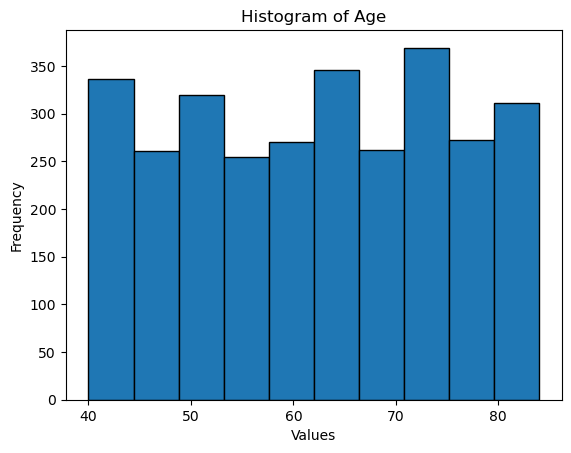

In [26]:
#To check normality of data

import matplotlib.pyplot as plt

plt.hist(data['Age'], bins=10, edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.show()

Since age is not normally distributed, using methods like the Z-score may not be appropriate. Instead, the Interquartile Range (IQR) method is a robust approach for detecting outliers, especially with skewed data.

In [27]:
#To calculate quartiles and IQR

Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

print(Q1,Q3,IQR)

51.0 73.0 22.0


In [28]:
# Step 2: Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

18.0 106.0


In [29]:
#Identify outliers
outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]

# Display outliers
if not outliers.empty:
    print("Outliers in Age:")
    print(outliers)
else:
    print("No outliers detected in Age.")

No outliers detected in Age.


Even though a box plot might not show obvious outliers based on statistical methods (like IQR), certain age values in the 117-year-old range may still be considered outliers from a clinical perspective because they fall outside of a typical age range for lung cancer patients.Capping the Age field to a maximum of 95 or 100 reflects a more realistic and medically appropriate range, based on what is commonly observed in this type of dataset.

In [30]:
# Cap the age to a maximum value of 95 or 100
data['Age'] = np.where(data['Age'] > 95, 95, data['Age'])

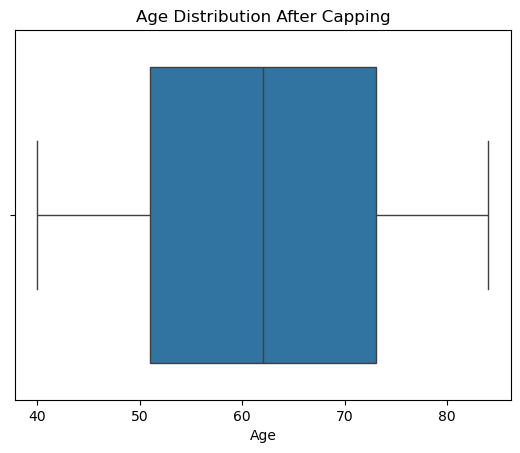

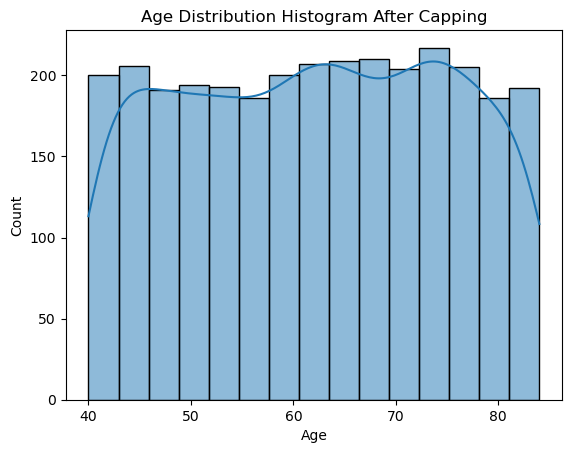

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot age distribution after capping
sns.boxplot(x=data['Age'])
plt.title('Age Distribution After Capping')
plt.show()

sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution Histogram After Capping')
plt.show()

The age data was capped at 95 years, as values above this threshold were deemed unrealistic in the context of the dataset. 

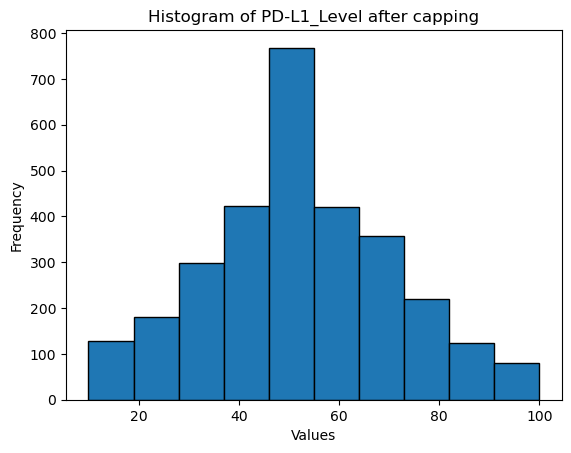

In [32]:
#To check normality of data, PD-L1_Level

import matplotlib.pyplot as plt

plt.hist(data['PD-L1_Level'], bins=10, edgecolor='black')
plt.title('Histogram of PD-L1_Level after capping')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

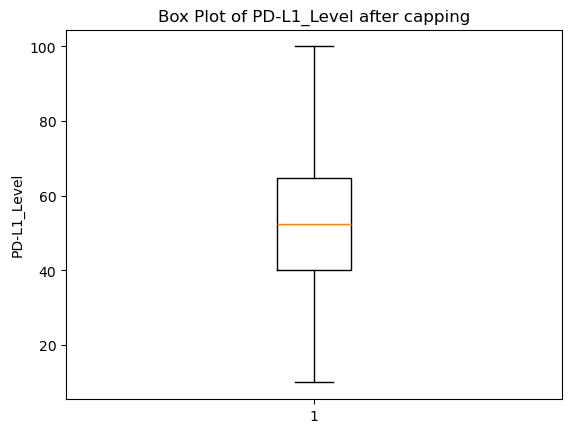

In [33]:
import matplotlib.pyplot as plt

plt.boxplot(data['PD-L1_Level'])
plt.title('Box Plot of PD-L1_Level after capping')
plt.ylabel('PD-L1_Level')
plt.show()


#Here PD-L1_Level field has no any outliers.

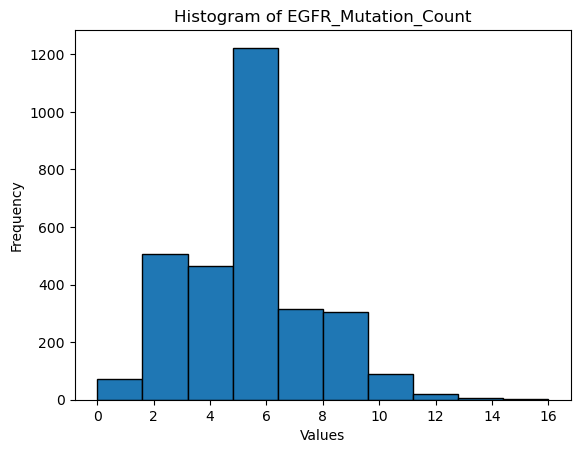

In [34]:
#To check normality of data EGFR_Mutation_Count

import matplotlib.pyplot as plt

plt.hist(data['EGFR_Mutation_Count'], bins=10, edgecolor='black')
plt.title('Histogram of EGFR_Mutation_Count')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

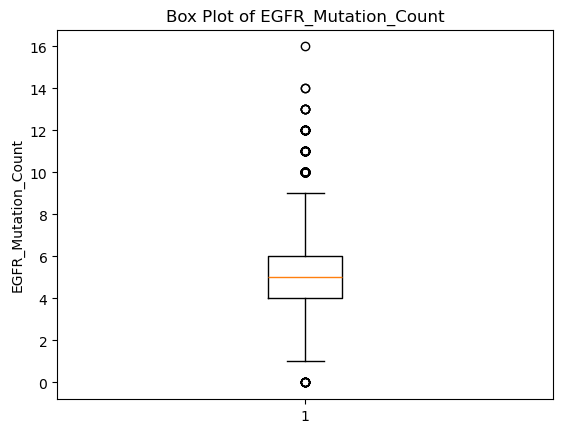

In [35]:
import matplotlib.pyplot as plt

plt.boxplot(data['EGFR_Mutation_Count'])
plt.title('Box Plot of EGFR_Mutation_Count')
plt.ylabel('EGFR_Mutation_Count')
plt.show()

In [36]:
# remove outlier by using capping method

data['EGFR_Mutation_Count'] = np.where(data['EGFR_Mutation_Count'] > 9, 9, data['EGFR_Mutation_Count'])
data['EGFR_Mutation_Count'] = np.where(data['EGFR_Mutation_Count'] < 2, 2, data['EGFR_Mutation_Count'])


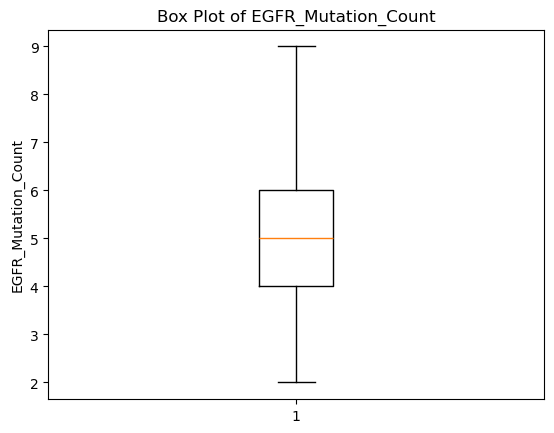

In [37]:

plt.boxplot(data['EGFR_Mutation_Count'])
plt.title('Box Plot of EGFR_Mutation_Count')
plt.ylabel('EGFR_Mutation_Count')
plt.show()

No any outliers detected in EGFR_Mutation_Count.

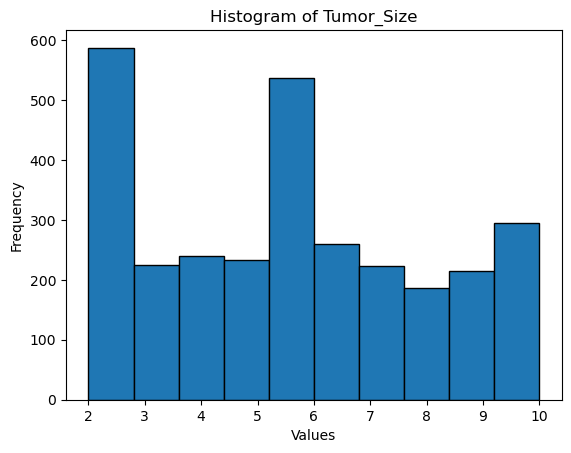

In [38]:
#To check normality of data Tumor_Size

import matplotlib.pyplot as plt

plt.hist(data['Tumor_Size'], bins=10, edgecolor='black')
plt.title('Histogram of Tumor_Size')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

It is observed that the values are positively skewed.

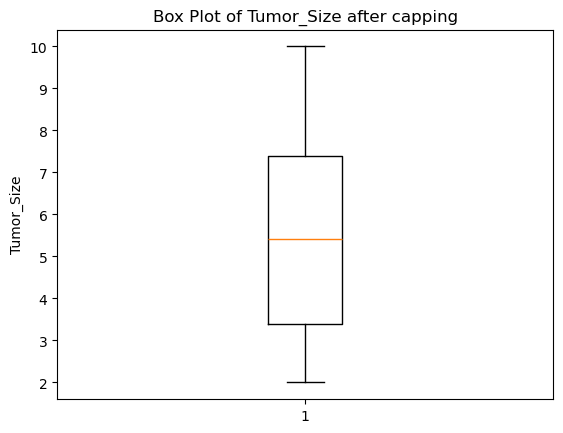

In [39]:

plt.boxplot(data['Tumor_Size'])
plt.title('Box Plot of Tumor_Size after capping')
plt.ylabel('Tumor_Size')
plt.show()

No outlier detected in EGFR_Mutation_Count.

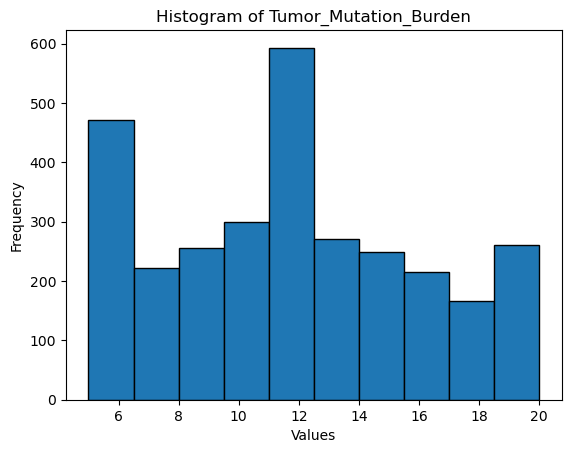

In [40]:
import matplotlib.pyplot as plt

plt.hist(data['Tumor_Mutation_Burden'], bins=10, edgecolor='black')
plt.title('Histogram of Tumor_Mutation_Burden')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

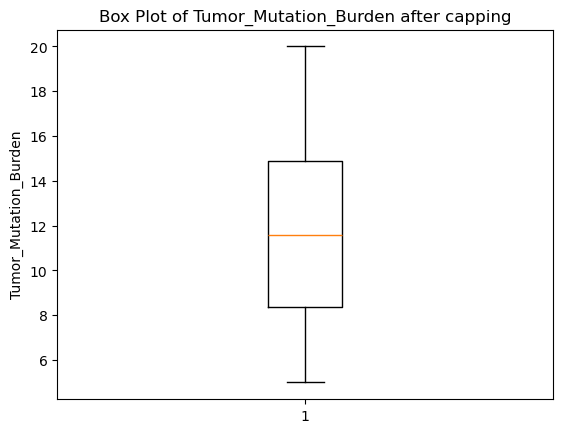

In [41]:
import matplotlib.pyplot as plt

plt.boxplot(data['Tumor_Mutation_Burden'])
plt.title('Box Plot of Tumor_Mutation_Burden after capping')
plt.ylabel('Tumor_Mutation_Burden')
plt.show()


No outliers detected in Tumor_Mutation_Burder after capping.

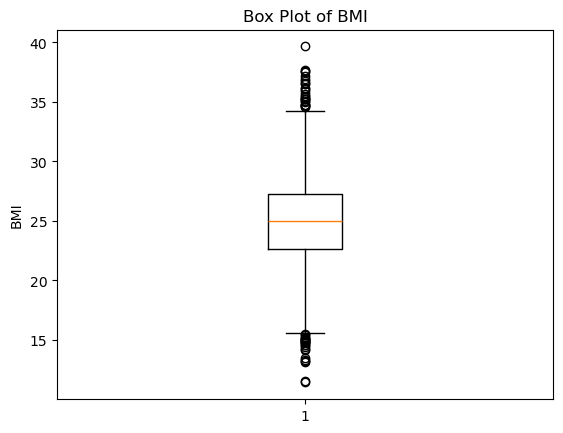

In [42]:

plt.boxplot(data['BMI'])
plt.title('Box Plot of BMI')
plt.ylabel('BMI')
plt.show()

In [43]:
# Assuming data['BMI'] already exists and you want to cap it
data['BMI'] = np.where(data['BMI'] > 30, 30, data['BMI'])  # Cap BMI at 40
data['BMI'] = np.where(data['BMI'] < 18.5, 18.5, data['BMI'])  # Cap BMI at 18.5


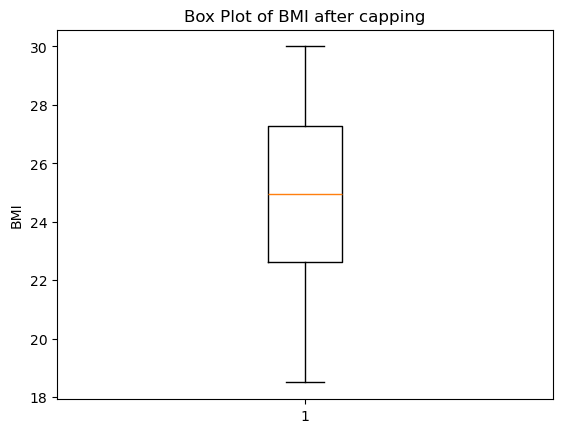

In [44]:

plt.boxplot(data['BMI'])
plt.title('Box Plot of BMI after capping')
plt.ylabel('BMI')
plt.show()

No Outliers detected in BMI after capping.

# Univariate Analysis

### Numerical Column

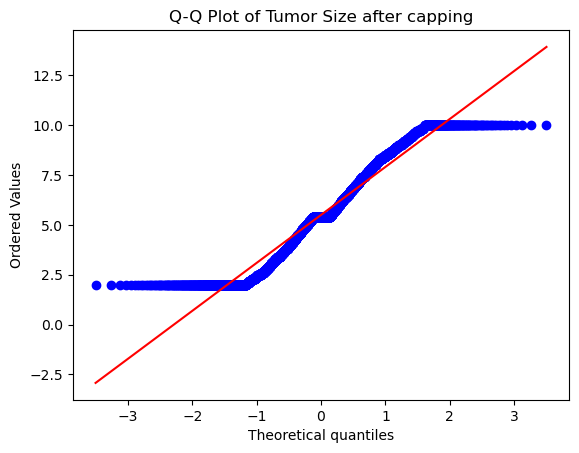

In [45]:
import scipy.stats as stats

# Q-Q Plot
stats.probplot(data['Tumor_Size'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Tumor Size after capping')
plt.show()


In [46]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk Test
stat, p_value = shapiro(data['Tumor_Size'])  
print(f"Shapiro-Wilk Test: p-value = {p_value}")

if p_value > 0.05:
    print("Data looks normally distributed (fail to reject H0).")
else:
    print("Data is not normally distributed (reject H0).")


Shapiro-Wilk Test: p-value = 1.7920971992713753e-32
Data is not normally distributed (reject H0).


In [47]:
from scipy.stats import skew

# Calculate skewness
skewness = skew(data['Tumor_Size'])
print(f"Skewness: {skewness}")


Skewness: 0.19455493204534463


After capping, the distribution of Tumor_Size remains right-skewed,  indicating that the majority of tumor sizes are smaller with a few extreme large tumor sizes. . This skewness can affect the logistic regression model, potentially leading to biased or less reliable predictions. Transforming Tumor_Size using a suitable transformation and standardizing it can make the data more symmetric and improve model performance.

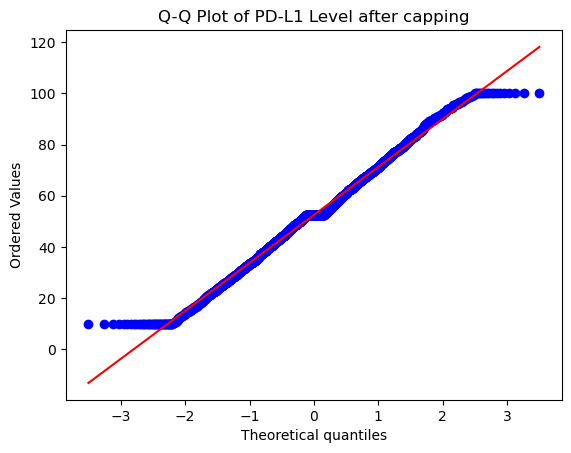

In [48]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot for PD-L1 Level
stats.probplot(data['PD-L1_Level'], dist="norm", plot=plt)
plt.title("Q-Q Plot of PD-L1 Level after capping")
plt.show()


In [49]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk Test
stat, p_value = shapiro(data['PD-L1_Level'])  
print(f"Shapiro-Wilk Test: p-value = {p_value}")

if p_value > 0.05:
    print("Data looks normally distributed (fail to reject H0).")
else:
    print("Data is not normally distributed (reject H0).")


Shapiro-Wilk Test: p-value = 9.59744823159747e-12
Data is not normally distributed (reject H0).


In [50]:
from scipy.stats import skew

# Calculate skewness
skewness = skew(data['PD-L1_Level'])
print(f"Skewness: {skewness}")


Skewness: 0.07113881219339942


The Q-Q plot is indicating right skewness in the variable, Since the skewness is so mild, it is unlikely to have a major impact on the performance of the logistic regression model. The data seems to be well-suited for modeling, and there may be no need for further transformations.

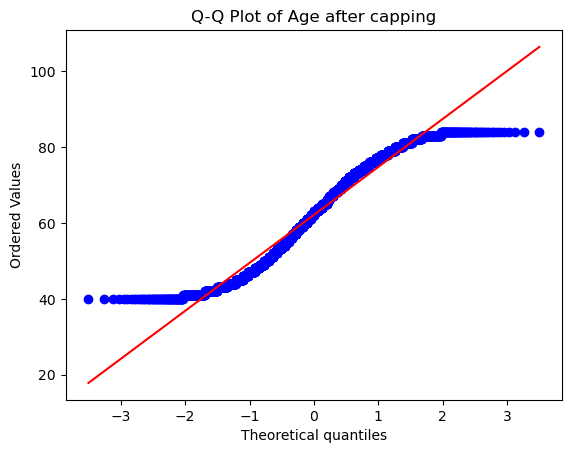

In [51]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot for PD-L1 Level
stats.probplot(data['Age'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Age after capping")
plt.show()


In [52]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk Test
stat, p_value = shapiro(data['Age'])  
print(f"Shapiro-Wilk Test: p-value = {p_value}")

if p_value > 0.05:
    print("Data looks normally distributed (fail to reject H0).")
else:
    print("Data is not normally distributed (reject H0).")

Shapiro-Wilk Test: p-value = 2.152931761799397e-29
Data is not normally distributed (reject H0).


In [53]:
from scipy.stats import skew

# Calculate skewness
skewness = skew(data['Age'])
print(f"Skewness: {skewness}")


Skewness: -0.02922162150232938


The Q-Q plot shows a slight left skewness in the variable, and the skewness value of -0.03 indicates that the distribution is very close to normal. Since the skewness is extremely mild, it is unlikely to have a significant impact on the performance of the logistic regression model. The data appears to be well-suited for modeling without the need for any further transformations.

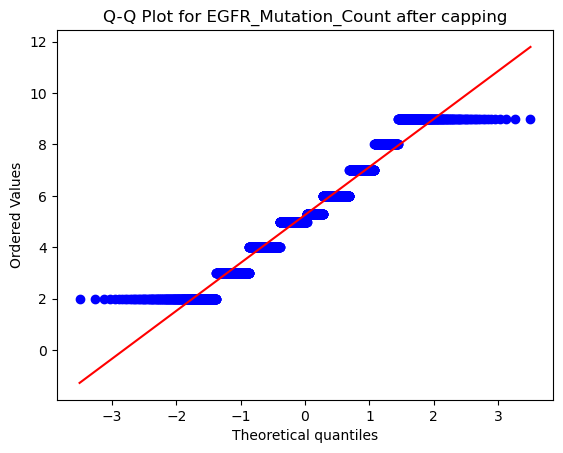

In [54]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot for EGFR_Mutation_Count
stats.probplot(data['EGFR_Mutation_Count'], dist="norm", plot=plt)
plt.title('Q-Q Plot for EGFR_Mutation_Count after capping')
plt.show()


In [55]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk Test
stat, p_value = shapiro(data['EGFR_Mutation_Count'])  
print(f"Shapiro-Wilk Test: p-value = {p_value}")

if p_value > 0.05:
    print("Data looks normally distributed (fail to reject H0).")
else:
    print("Data is not normally distributed (reject H0).")

Shapiro-Wilk Test: p-value = 1.7395686460644948e-29
Data is not normally distributed (reject H0).


In [56]:
from scipy.stats import skew

# Calculate skewness
skewness = skew(data['EGFR_Mutation_Count'])
print(f"Skewness: {skewness}")


Skewness: 0.20528093641370448


The Q-Q plot and the skewness value of 0.2053 suggest that the distribution of EGFR_Mutation_Count is mildly right-skewed. This indicates that while the majority of patients have lower mutation counts, a few patients exhibit higher mutation counts. Given the mild skewness, it is unlikely to significantly affect the performance of the logistic regression model. The data is relatively well-behaved for modeling, and no major transformations are required. 

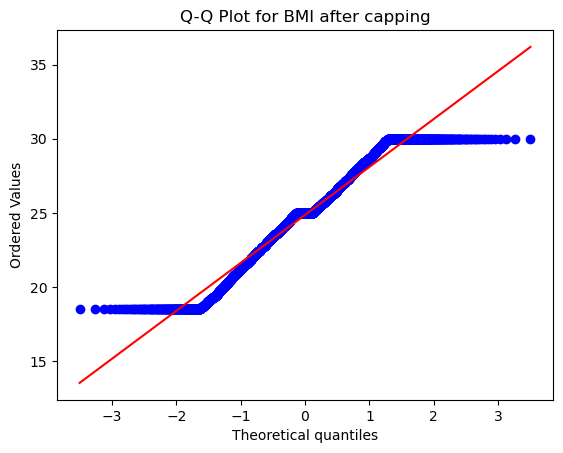

In [57]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot for EGFR_Mutation_Count
stats.probplot(data['BMI'], dist="norm", plot=plt)
plt.title('Q-Q Plot for BMI after capping')
plt.show()

In [58]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk Test
stat, p_value = shapiro(data['BMI'])  
print(f"Shapiro-Wilk Test: p-value = {p_value}")

if p_value > 0.05:
    print("Data looks normally distributed (fail to reject H0).")
else:
    print("Data is not normally distributed (reject H0).")

Shapiro-Wilk Test: p-value = 4.5846283418044975e-28
Data is not normally distributed (reject H0).


In [59]:
from scipy.stats import skew

# Calculate skewness
skewness = skew(data['BMI'])
print(f"Skewness: {skewness}")

Skewness: -0.19608854284382068


The Q-Q plot and the skewness value of -0.1961 indicate that the distribution of BMI is slightly left-skewed. This suggests that most of the values are concentrated on the higher end of the scale, with fewer lower BMI values. Since the skewness is mild, it is unlikely to have a major impact on the performance of the logistic regression model. The data appears to be suitable for modeling, and no transformations are necessary at this stage.

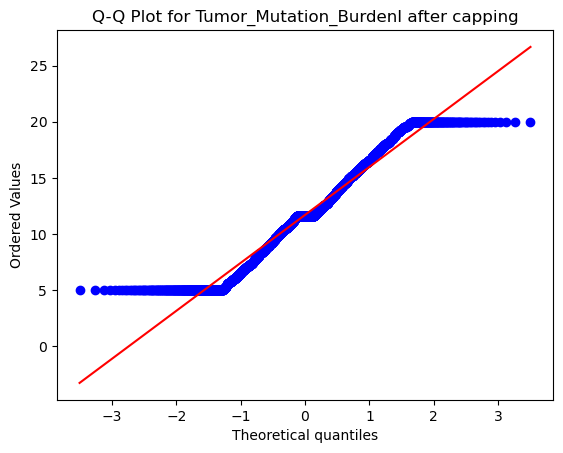

In [60]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot for EGFR_Mutation_Count
stats.probplot(data['Tumor_Mutation_Burden'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Tumor_Mutation_BurdenI after capping')
plt.show()

In [61]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk Test
stat, p_value = shapiro(data['Tumor_Mutation_Burden'])  
print(f"Shapiro-Wilk Test: p-value = {p_value}")

if p_value > 0.05:
    print("Data looks normally distributed (fail to reject H0).")
else:
    print("Data is not normally distributed (reject H0).")

Shapiro-Wilk Test: p-value = 1.843292052607872e-28
Data is not normally distributed (reject H0).


In [62]:
from scipy.stats import skew

# Calculate skewness
skewness = skew(data['Tumor_Mutation_Burden'])
print(f"Skewness: {skewness}")

Skewness: 0.18081302335945562


The Q-Q plot and the skewness value of 0.1808 indicate a mild right-skewness in the distribution of Tumor Mutation Burden. This suggests that most of the values are clustered at the lower end, with a few higher values. Since the skewness is mild, it is unlikely to have a significant impact on the performance of the logistic regression model. The data seems to be reasonably suitable for modeling, and no immediate transformations are necessary. 

### Categorical Columns

Gender
Male      1538
Female    1462
Name: count, dtype: Int64
Cancer_Stage
Stage IV     1190
Stage III    1037
Stage II      773
Name: count, dtype: Int64


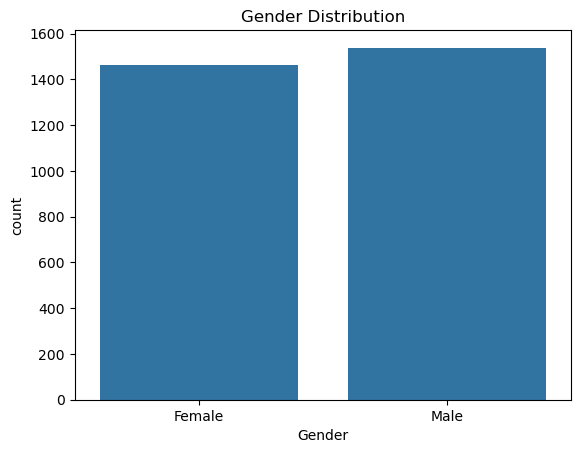

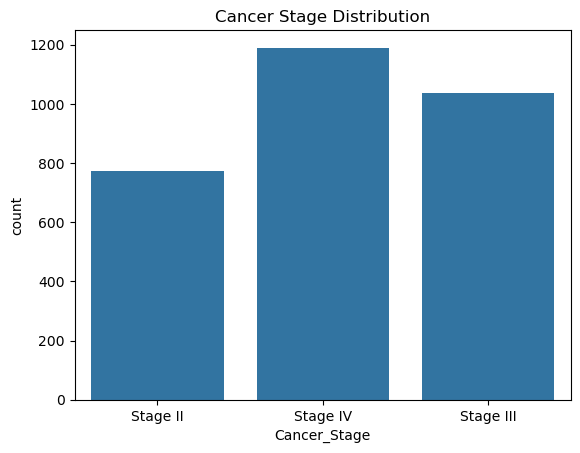

In [63]:
# Frequency count for categorical features
print(data['Gender'].value_counts())
print(data['Cancer_Stage'].value_counts())

# Bar Plot for Cancer Stage
sns.countplot(data=data, x='Gender')
plt.title("Gender Distribution")
plt.show()



# Bar Plot for Cancer Stage
sns.countplot(data=data, x='Cancer_Stage')
plt.title("Cancer Stage Distribution")
plt.show()


Gender: 
The Gender distribution shows a balanced dataset, with 1538 females and 1462 males. There is no significant imbalance between the categories, which is good for logistic regression, as it ensures that the model doesn't favor one category over the other. It can be be encoded into a binary form (e.g., Female = 0, Male = 1) for logistic regression, ensuring the model interprets it correctly.

Cancer Stage: 
    The distribution of Cancer Stages shows that Stage IV (1190 samples) has the highest frequency, followed by Stage III (1037 samples), and Stage II (773 samples). While Stage IV is the most common, the dataset still provides a reasonably balanced representation of all three stages. This balance is beneficial for logistic regression, as it helps prevent the model from being biased toward any one category. The Cancer Stage variable can be encoded as categorical data (e.g., Stage II = 0, Stage III = 1, Stage IV = 2) to allow the logistic regression model to interpret it effectively.


Smoking_Status
Former     1231
Never       890
Current     879
Name: count, dtype: Int64
Treatment_Type
Chemotherapy     1519
Immunotherapy    1481
Name: count, dtype: Int64


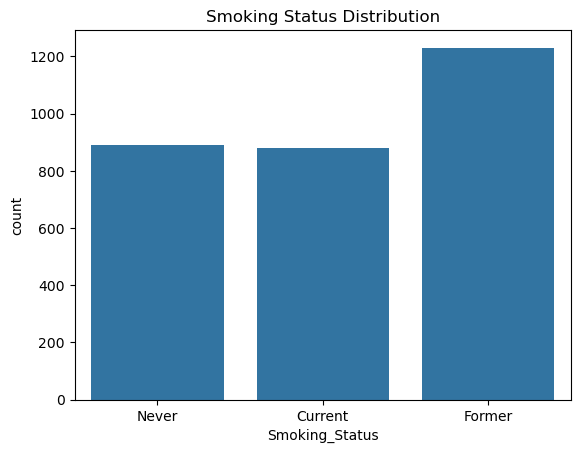

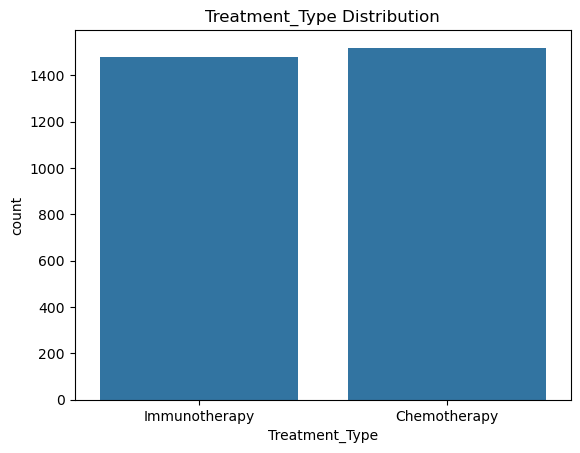

In [64]:
# Frequency count for categorical features
print(data['Smoking_Status'].value_counts())

print(data['Treatment_Type'].value_counts())

# Bar Plot for Smoking Status
sns.countplot(data=data, x='Smoking_Status')
plt.title("Smoking Status Distribution")
plt.show()

sns.countplot(data=data, x='Treatment_Type')
plt.title("Treatment_Type Distribution")
plt.show()

Smoking Status:
    The distribution of Smoking Status shows a relatively balanced dataset, with Former smokers (1231 samples) being the most common, followed by Never smokers (890 samples) and Current smokers (879 samples). The dataset is not heavily imbalanced, which is good for logistic regression, as it reduces the likelihood of model bias towards one category. The Smoking Status variable can be encoded as categorical data (e.g., Former = 0, Never = 1, Current = 2) for logistic regression to ensure proper interpretation by the model.

Treatment Type: The distribution of Treatment Type shows that the dataset is fairly balanced, with Chemotherapy (1519 samples) being slightly more frequent than Immunotherapy (1481 samples). Since the categories are nearly equal in size, there is no significant imbalance, which is beneficial for logistic regression, as it ensures the model is not biased toward one treatment type. Treatment Type can be encoded as categorical data (e.g., Chemotherapy = 0, Immunotherapy = 1) for logistic regression to facilitate accurate model interpretation.

KRAS_Mutation_Status
Negative    2125
Positive     875
Name: count, dtype: int64
ALK_Rearrangement_Status
Negative    2401
Positive     599
Name: count, dtype: int64


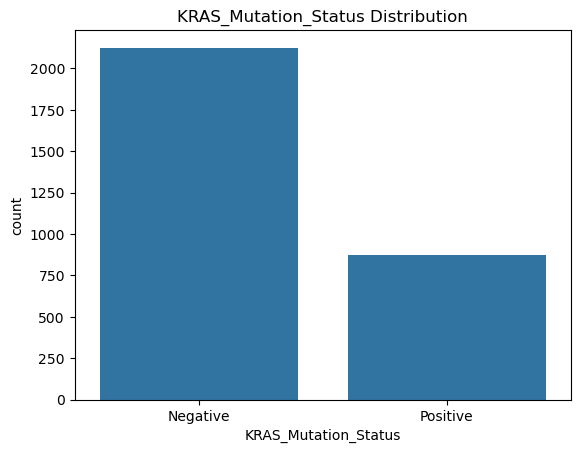

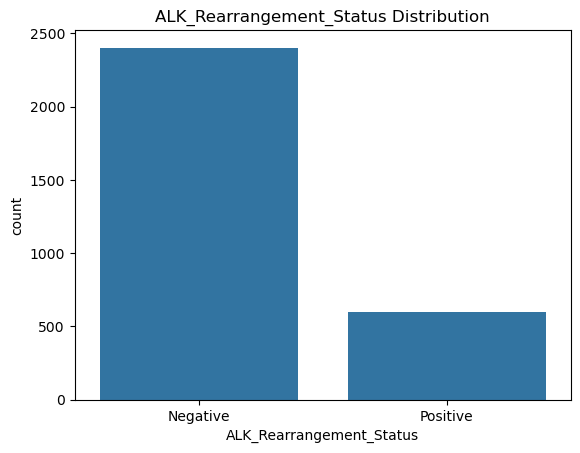

In [65]:
# Frequency count for categorical features
print(data['KRAS_Mutation_Status'].value_counts())

print(data['ALK_Rearrangement_Status'].value_counts())

# Bar Plot for Smoking Status
sns.countplot(data=data, x='KRAS_Mutation_Status')
plt.title("KRAS_Mutation_Status Distribution")
plt.show()

sns.countplot(data=data, x='ALK_Rearrangement_Status')
plt.title("ALK_Rearrangement_Status Distribution")
plt.show()

KRAS Mutation Status: The KRAS Mutation Status distribution shows an imbalance between the categories, with Negative (2125 samples) being significantly more common than Positive (875 samples). This imbalance could potentially affect the performance of a logistic regression model, as it may bias the model toward predicting the Negative class. To address this, techniques such as resampling (e.g., oversampling the Positive class or undersampling the Negative class) or using class weights in the logistic regression model can help mitigate this issue.

ALK Rearrangement Status: The ALK Rearrangement Status also shows an imbalance, with Negative (2401 samples) being much more frequent than Positive (599 samples). Similar to the KRAS Mutation Status, this imbalance could lead to model bias. To improve model performance, methods like oversampling, undersampling, or adjusting class weights in the logistic regression model can be considered to balance the dataset

Comorbidities
No     1815
Yes    1185
Name: count, dtype: int64
CT_Scan_Analysis
Moderate Density    1027
Low Density         1004
High Density         969
Name: count, dtype: int64


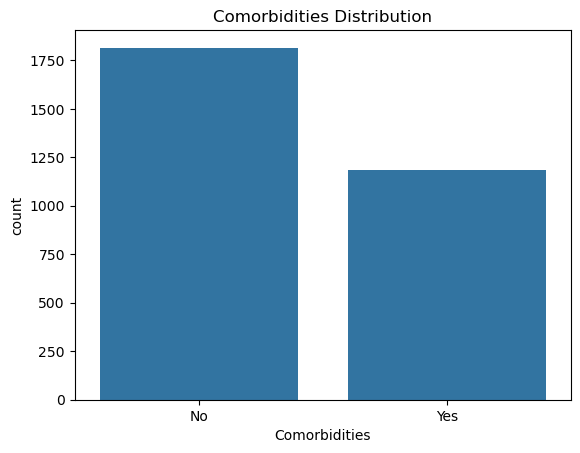

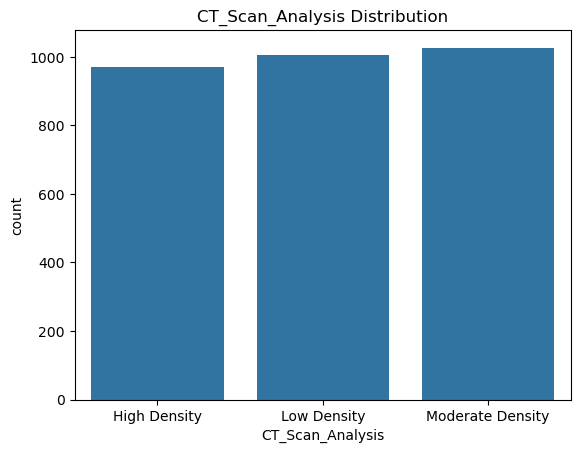

In [66]:
# Frequency count for categorical features
print(data['Comorbidities'].value_counts())

print(data['CT_Scan_Analysis'].value_counts())

# Bar Plot for Smoking Status
sns.countplot(data=data, x='Comorbidities')
plt.title("Comorbidities Distribution")
plt.show()

sns.countplot(data=data, x='CT_Scan_Analysis')
plt.title("CT_Scan_Analysis Distribution")
plt.show()

Comorbidities: The Comorbidities distribution shows a reasonably balanced dataset, with No comorbidities (1815 samples) slightly outnumbering those with Yes comorbidities (1185 samples). While the dataset is not perfectly balanced, the difference in the number of samples is not extreme. This slight imbalance is unlikely to significantly affect the performance of logistic regression.

CT Scan Analysis: The CT Scan Analysis distribution shows a relatively balanced distribution across the three categories: Moderate Density (1027 samples), Low Density (1004 samples), and High Density (969 samples). This balanced distribution is good for logistic regression modeling, as it ensures that the model will not be biased toward any particular category.

In [67]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Cancer_Stage', 'PD-L1_Level',
       'EGFR_Mutation_Count', 'Tumor_Size', 'Treatment_Type', 'Smoking_Status',
       'Response', 'KRAS_Mutation_Status', 'ALK_Rearrangement_Status',
       'Tumor_Mutation_Burden', 'BMI', 'Comorbidities', 'CT_Scan_Analysis'],
      dtype='object')

# Bivariate Analysis

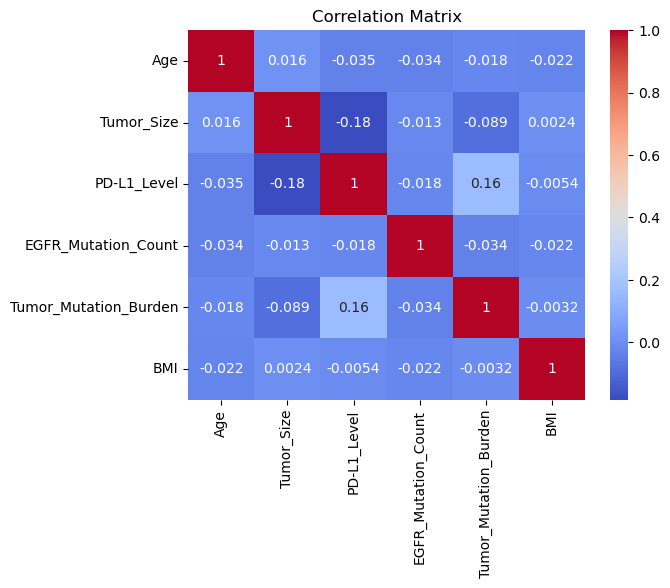

In [ ]:

# Correlation matrix for numerical features
corr_matrix = data[['Age', 'Tumor_Size', 'PD-L1_Level', 'EGFR_Mutation_Count', "Tumor_Mutation_Burden", "BMI", ]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


The correlation between Age, Tumor Size, PD-L1 Level, and EGFR Mutation Count is very weak, meaning these variables don't strongly influence each other. This is good for logistic regression as it reduces the risk of multicollinearity, allowing each feature to contribute independently to the model.

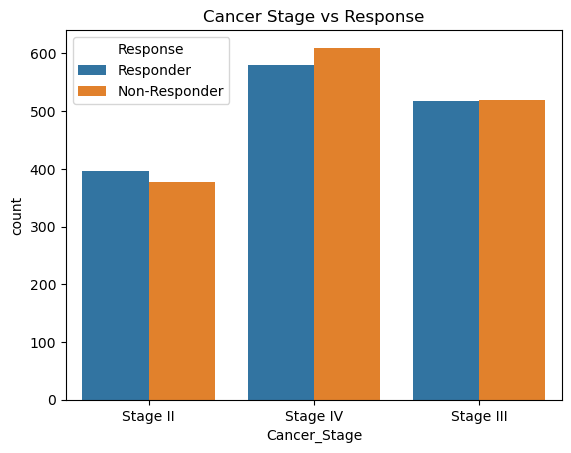

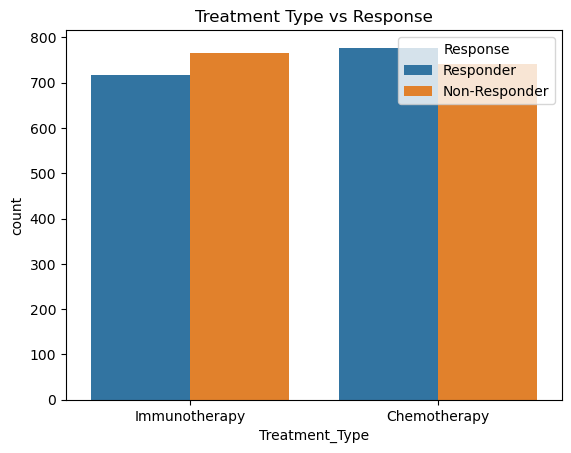

In [70]:
# For Treatment_Type vs Response
sns.countplot(data=data, x='Cancer_Stage', hue='Response')
plt.title("Cancer Stage vs Response")
plt.show()

# For Treatment_Type vs Response
sns.countplot(data=data, x='Treatment_Type', hue='Response')
plt.title("Treatment Type vs Response")
plt.show()




Cancer Stage vs Response: The analysis shows that response rates are similar across Stage III and Stage IV cancers, with a slight improvement in response for Stage II patients. This suggests that treatment effectiveness may decrease as the cancer stage progresses. This suggests that while early-stage patients might benefit more from treatment, additional factors like genetic mutations and comorbidities likely play a crucial role in predicting response in advanced stages.

Treatment Type vs Response: The analysis shows a slightly higher response rate for Chemotherapy (51.1%) compared to Immunotherapy (48.3%), with no significant imbalance to affect logistic regression negatively. Although Chemotherapy has a marginally better outcome, treatment decisions should consider factors like cancer stage, genetic mutations, and patient health for accurate predictions.

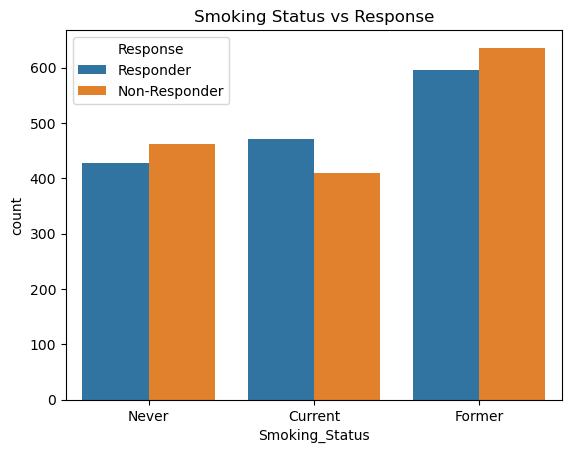

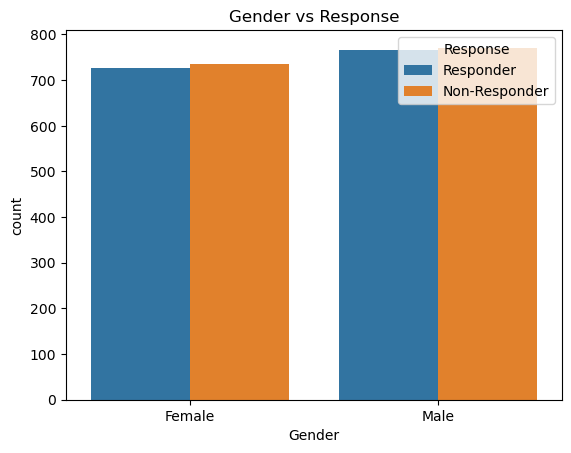

In [69]:
# For Smoking_Status vs Response
sns.countplot(data=data, x='Smoking_Status', hue='Response')
plt.title("Smoking Status vs Response")
plt.show()

# For Gender vs Response
sns.countplot(data=data, x='Gender', hue='Response')
plt.title("Gender vs Response")
plt.show()

Smoking Status vs Response:
   The analysis of Smoking Status vs Response shows a fairly balanced distribution across the different smoking categories. While the response rate is slightly higher for current smokers (53.5%) compared to former (48.3%) and never smokers (47.9%), there is no significant imbalance that would negatively impact logistic regression. Smoking status may provide some predictive value, but it should be considered alongside other factors for more accurate treatment predictions.

Gender vs Resoponse:
The analysis of Gender vs Response shows a nearly balanced distribution between males and females, with a slight difference in response rates (Male: 49.9%, Female: 49.6%). This balance suggests that gender is unlikely to introduce bias in a logistic regression model. Gender may contribute to predicting response, but other factors should be considered to improve model accuracy.

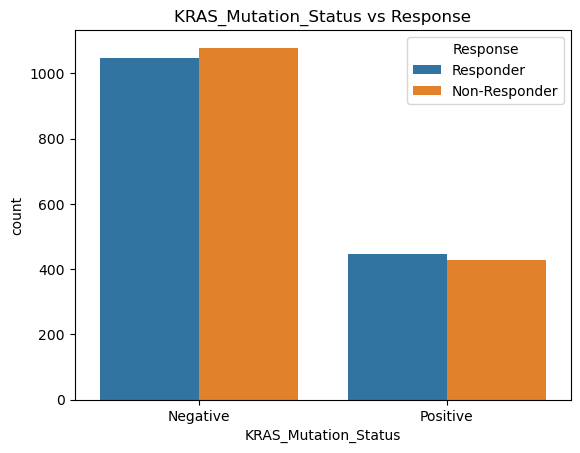

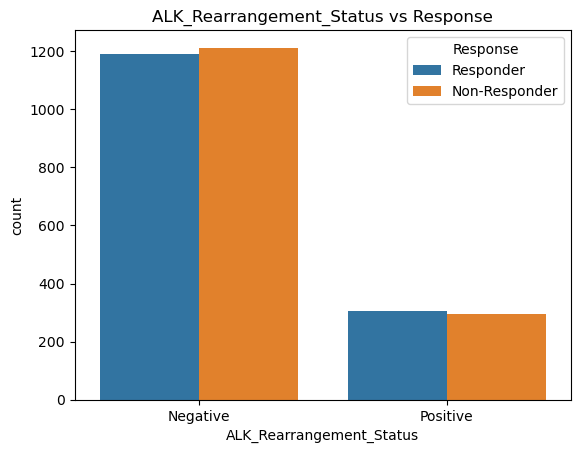

In [71]:
# For Smoking_Status vs Response
sns.countplot(data=data, x='KRAS_Mutation_Status', hue='Response')
plt.title("KRAS_Mutation_Status vs Response")
plt.show()

# For Gender vs Response
sns.countplot(data=data, x='ALK_Rearrangement_Status', hue='Response')
plt.title("ALK_Rearrangement_Status vs Response")
plt.show()

KRAS Mutation Status vs Response: The analysis of  shows a slightly higher response rate for individuals with a positive KRAS mutation (51.0%) compared to those with a negative mutation (49.5%). While the response rates are similar, the distribution of responses is fairly balanced, suggesting that KRAS mutation status alone may not significantly skew the response. Further analysis, possibly incorporating additional factors, could improve the prediction of treatment outcomes in a logistic regression model.

ALK_Rearrangement_Status vs Response: 
The analysis of ALK Rearrangement Status vs Response shows that individuals with a negative ALK rearrangement status have a higher number of responders (49.6%) compared to those with a positive status (50.7%). However, the distribution of responses is still relatively balanced across both categories, indicating that ALK rearrangement status might not be a strong standalone predictor of response in a logistic regression model. Further exploration with additional factors is recommended.

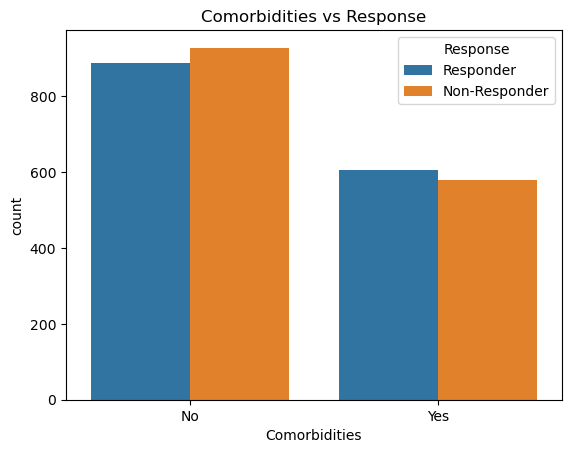

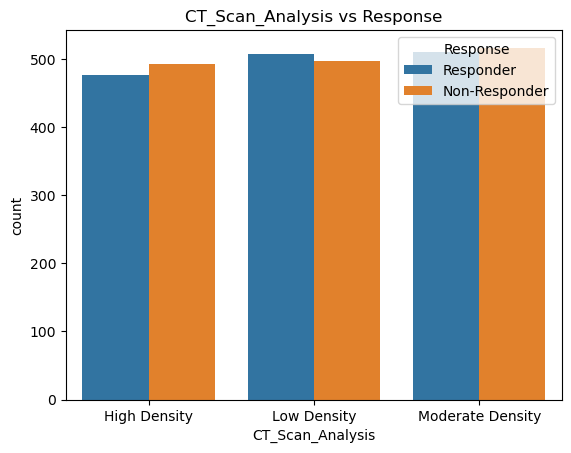

In [72]:
# For Smoking_Status vs Response
sns.countplot(data=data, x='Comorbidities', hue='Response')
plt.title("Comorbidities vs Response")
plt.show()

# For Gender vs Response
sns.countplot(data=data, x='CT_Scan_Analysis', hue='Response')
plt.title("CT_Scan_Analysis vs Response")
plt.show()

Comorbidities vs Response: The analysis of shows a higher response rate for individuals with comorbidities (51.2%) compared to those without comorbidities (48.9%). Although the response rates are similar, individuals with comorbidities tend to have a slightly higher response rate. This suggests that comorbidities may have a modest influence on treatment response. However, a more detailed analysis considering other factors should be performed for a more robust understanding.

CT_Scan_Analysis vs Response: The analysis shows that the response rates are fairly consistent across different density categories. Moderate density has the highest response rate (49.7%), followed by low density (50.5%) and high density (49.1%). Although there are slight variations in response rates, they are relatively balanced across all CT scan density categories. This suggests that CT scan density may not be a strong predictor of treatment response, and other factors should be considered for more accurate predictions.

# Feature Engineering

In [145]:
#import MinMaxScalar
from sklearn.preprocessing import MinMaxScaler

# seprate numerical columns
numerical_columns = ["Age", "PD-L1_Level", "EGFR_Mutation_Count", "Tumor_Size","Tumor_Mutation_Burden", "BMI", ]

scaler = MinMaxScaler()

# Apply MinMaxScaler
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

data.head()


,Patient_ID,Age,Gender,Cancer_Stage,PD-L1_Level,EGFR_Mutation_Count,Tumor_Size,Treatment_Type,Smoking_Status,Response,KRAS_Mutation_Status,ALK_Rearrangement_Status,Tumor_Mutation_Burden,BMI,Comorbidities,CT_Scan_Analysis
0,1,0.863636,Female,Stage II,0.415556,0.333333,0.6250,Immunotherapy,Never,Responder,Negative,Negative,0.386118,0.862619,No,High Density
1,2,0.636364,Female,Stage IV,0.725556,1.000000,0.5125,Immunotherapy,Current,Responder,Positive,Negative,0.151156,0.364947,Yes,High Density
2,3,0.318182,Male,Stage IV,0.015556,1.000000,0.4625,Immunotherapy,Former,Non-Responder,Negative,Negative,0.189779,0.561902,Yes,Low Density
3,4,0.954545,Male,Stage IV,0.323333,1.000000,0.1750,Immunotherapy,Never,Non-Responder,Negative,Negative,0.693378,0.681937,No,Low Density
4,5,0.159091,Female,Stage IV,0.471288,0.666667,0.2125,Chemotherapy,Current,Responder,Negative,Negative,0.404238,0.000000,No,High Density


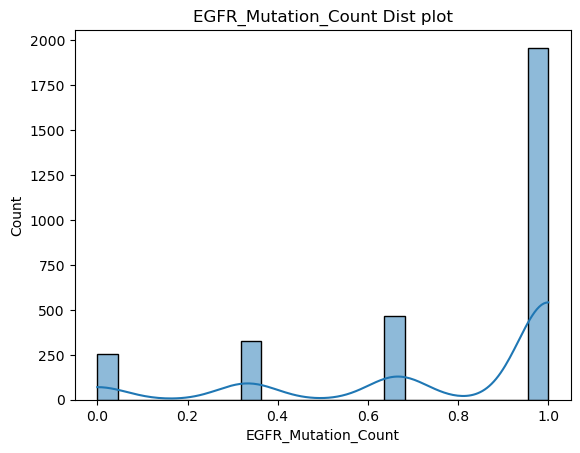

In [146]:
# QQ Plot after normalization

#stats.probplot(data['EGFR_Mutation_Count'], dist="norm", plot=plt)
#plt.title('Q-Q Plot for EGFR_Mutation_Count')
#plt.show()

sns.histplot(data['EGFR_Mutation_Count'], kde=True)
plt.title('EGFR_Mutation_Count Dist plot')
plt.show()


Min-Max scaling was applied to normalize the values of numerical features, bringing them into a range of 0 to 1. This transformation helps ensure that each feature contributes equally to the model                               
Min-Max scaling preserves the relative distribution of values within a feature, making it ideal for cases where you want to retain the relationships between values without introducing negative numbers or changing the data distribution's shape.

# One Hot Encoding

In [147]:

data1 = pd.get_dummies(data, columns=['Gender', 'Treatment_Type', 'Smoking_Status',"KRAS_Mutation_Status", "ALK_Rearrangement_Status", "Comorbidities" ], drop_first=True)
data1.head()


,Patient_ID,Age,Cancer_Stage,PD-L1_Level,EGFR_Mutation_Count,Tumor_Size,Response,Tumor_Mutation_Burden,BMI,CT_Scan_Analysis,Gender_Male,Treatment_Type_Immunotherapy,Smoking_Status_Former,Smoking_Status_Never,KRAS_Mutation_Status_Positive,ALK_Rearrangement_Status_Positive,Comorbidities_Yes
0,1,0.863636,Stage II,0.415556,0.333333,0.6250,Responder,0.386118,0.862619,High Density,False,True,False,True,False,False,False
1,2,0.636364,Stage IV,0.725556,1.000000,0.5125,Responder,0.151156,0.364947,High Density,False,True,False,False,True,False,True
2,3,0.318182,Stage IV,0.015556,1.000000,0.4625,Non-Responder,0.189779,0.561902,Low Density,True,True,True,False,False,False,True
3,4,0.954545,Stage IV,0.323333,1.000000,0.1750,Non-Responder,0.693378,0.681937,Low Density,True,True,False,True,False,False,False
4,5,0.159091,Stage IV,0.471288,0.666667,0.2125,Responder,0.404238,0.000000,High Density,False,False,False,False,False,False,False


In the code above, one-hot encoding is applied to columns like Gender, Treatment_Type, and Smoking_Status because these columns are nominal, meaning their categories represent distinct groups without any meaningful order.

# Label Encoding - Using Maping

In [148]:
data1['Cancer_Stage'].unique()

<StringArray>
['Stage II', 'Stage IV', 'Stage III']
Length: 3, dtype: string

In [149]:
data1['CT_Scan_Analysis'].unique()

array(['High Density', 'Low Density', 'Moderate Density'], dtype=object)

In [150]:
# By using maping function

data1['Cancer_Stage'] = data1["Cancer_Stage"].map({'Stage II':0,'Stage III':1, 'Stage IV':2})
data1.head(2)

,Patient_ID,Age,Cancer_Stage,PD-L1_Level,EGFR_Mutation_Count,Tumor_Size,Response,Tumor_Mutation_Burden,BMI,CT_Scan_Analysis,Gender_Male,Treatment_Type_Immunotherapy,Smoking_Status_Former,Smoking_Status_Never,KRAS_Mutation_Status_Positive,ALK_Rearrangement_Status_Positive,Comorbidities_Yes
0,1,0.863636,0,0.415556,0.333333,0.6250,Responder,0.386118,0.862619,High Density,False,True,False,True,False,False,False
1,2,0.636364,2,0.725556,1.000000,0.5125,Responder,0.151156,0.364947,High Density,False,True,False,False,True,False,True


In [151]:
# By using maping function

data1['CT_Scan_Analysis'] = data1["CT_Scan_Analysis"].map({'Low Density':0,'Moderate Density':1, 'High Density':2})
data1.head(2)

,Patient_ID,Age,Cancer_Stage,PD-L1_Level,EGFR_Mutation_Count,Tumor_Size,Response,Tumor_Mutation_Burden,BMI,CT_Scan_Analysis,Gender_Male,Treatment_Type_Immunotherapy,Smoking_Status_Former,Smoking_Status_Never,KRAS_Mutation_Status_Positive,ALK_Rearrangement_Status_Positive,Comorbidities_Yes
0,1,0.863636,0,0.415556,0.333333,0.6250,Responder,0.386118,0.862619,2,False,True,False,True,False,False,False
1,2,0.636364,2,0.725556,1.000000,0.5125,Responder,0.151156,0.364947,2,False,True,False,False,True,False,True


To perform label encoding on the Cancer_Stage column using the map function, we can map each stage to a meaningful ordinal value. Since Cancer_Stage is ordinal, encoding it in sequence (e.g., Stage I = 0, Stage II = 1, Stage III = 2) will maintain the meaningful order.

In [152]:
# Import LabelEncoder

from sklearn.preprocessing import LabelEncoder

Encoder = LabelEncoder()

In [153]:
# Convert the target column into numerical

data1['Response'] = Encoder.fit_transform(data1['Response'])
data1.head()

,Patient_ID,Age,Cancer_Stage,PD-L1_Level,EGFR_Mutation_Count,Tumor_Size,Response,Tumor_Mutation_Burden,BMI,CT_Scan_Analysis,Gender_Male,Treatment_Type_Immunotherapy,Smoking_Status_Former,Smoking_Status_Never,KRAS_Mutation_Status_Positive,ALK_Rearrangement_Status_Positive,Comorbidities_Yes
0,1,0.863636,0,0.415556,0.333333,0.6250,1,0.386118,0.862619,2,False,True,False,True,False,False,False
1,2,0.636364,2,0.725556,1.000000,0.5125,1,0.151156,0.364947,2,False,True,False,False,True,False,True
2,3,0.318182,2,0.015556,1.000000,0.4625,0,0.189779,0.561902,0,True,True,True,False,False,False,True
3,4,0.954545,2,0.323333,1.000000,0.1750,0,0.693378,0.681937,0,True,True,False,True,False,False,False
4,5,0.159091,2,0.471288,0.666667,0.2125,1,0.404238,0.000000,2,False,False,False,False,False,False,False


In [154]:
# Rearrange the target column

# Empty list for columns
columns = []

# adding all columns except "Response" col
for i in data1.columns:
    if i != "Response":
        columns.append(i)

# append response column at the end         
columns.append('Response')

new_df = data1[columns]

new_df.head()

,Patient_ID,Age,Cancer_Stage,PD-L1_Level,EGFR_Mutation_Count,Tumor_Size,Tumor_Mutation_Burden,BMI,CT_Scan_Analysis,Gender_Male,Treatment_Type_Immunotherapy,Smoking_Status_Former,Smoking_Status_Never,KRAS_Mutation_Status_Positive,ALK_Rearrangement_Status_Positive,Comorbidities_Yes,Response
0,1,0.863636,0,0.415556,0.333333,0.6250,0.386118,0.862619,2,False,True,False,True,False,False,False,1
1,2,0.636364,2,0.725556,1.000000,0.5125,0.151156,0.364947,2,False,True,False,False,True,False,True,1
2,3,0.318182,2,0.015556,1.000000,0.4625,0.189779,0.561902,0,True,True,True,False,False,False,True,0
3,4,0.954545,2,0.323333,1.000000,0.1750,0.693378,0.681937,0,True,True,False,True,False,False,False,0
4,5,0.159091,2,0.471288,0.666667,0.2125,0.404238,0.000000,2,False,False,False,False,False,False,False,1


In [155]:
new_df["Tumor_Size"].skew()

0.19465227170187083

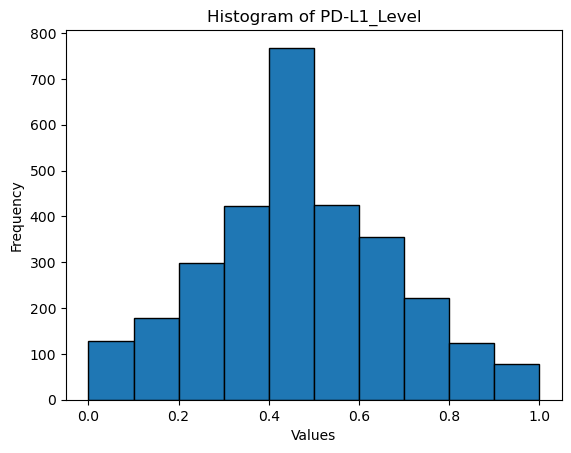

In [156]:
import matplotlib.pyplot as plt

plt.hist(data['PD-L1_Level'], bins=10, edgecolor='black')
plt.title('Histogram of PD-L1_Level')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

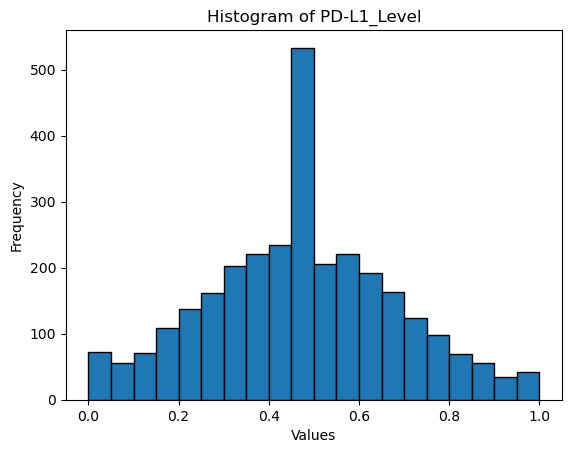

In [157]:
import matplotlib.pyplot as plt

plt.hist(data['PD-L1_Level'], bins=20, edgecolor='black')
plt.title('Histogram of PD-L1_Level')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [158]:
new_df.head()

,Patient_ID,Age,Cancer_Stage,PD-L1_Level,EGFR_Mutation_Count,Tumor_Size,Tumor_Mutation_Burden,BMI,CT_Scan_Analysis,Gender_Male,Treatment_Type_Immunotherapy,Smoking_Status_Former,Smoking_Status_Never,KRAS_Mutation_Status_Positive,ALK_Rearrangement_Status_Positive,Comorbidities_Yes,Response
0,1,0.863636,0,0.415556,0.333333,0.6250,0.386118,0.862619,2,False,True,False,True,False,False,False,1
1,2,0.636364,2,0.725556,1.000000,0.5125,0.151156,0.364947,2,False,True,False,False,True,False,True,1
2,3,0.318182,2,0.015556,1.000000,0.4625,0.189779,0.561902,0,True,True,True,False,False,False,True,0
3,4,0.954545,2,0.323333,1.000000,0.1750,0.693378,0.681937,0,True,True,False,True,False,False,False,0
4,5,0.159091,2,0.471288,0.666667,0.2125,0.404238,0.000000,2,False,False,False,False,False,False,False,1


In [159]:
# Splitting data
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

X = new_df.drop(columns=['Patient_ID', 'Response'])
y = new_df['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [160]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


# Define parameter grid for Logistic Regression

param_grid_lr = {'C': [0.01, 0.1, 1, 10],
                 'penalty': ['l1', 'l2'],
                'max_iter':[100, 300,500, 700]}


# Grid search for Logistic Regression
lr = LogisticRegression()
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='recall', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

# Evaluate Logistic Regression model
best_model_lr = grid_search_lr.best_estimator_
y_pred_lr = best_model_lr.predict(X_test)
recall_lr = recall_score(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("Best Logistic Regression Model:", best_model_lr)
print("Recall for Logistic Regression:", recall_lr)
print("Accuracy for Logistic Regression:", accuracy_lr)



Best Logistic Regression Model: LogisticRegression(C=0.01)
Recall for Logistic Regression: 0.8168498168498168
Accuracy for Logistic Regression: 0.7666666666666667


c:\Users\admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = 

In [161]:


from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler



# Define parameter grid for XGBoost
param_grid_xgb = {'n_estimators': [100, 200, 300,500],
                  'max_depth': [3, 5, 7,9],
                  'learning_rate': [0.01, 0.1, 0.001]}

# Grid search for XGBoost
xgb = XGBClassifier(random_state=42)
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='recall', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Evaluate XGBoost model
best_model_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test
                                   )
recall_xgb = recall_score(y_test, y_pred_xgb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print("Best XGBoost Model:", best_model_xgb)
print("Recall for XGBoost:", recall_xgb)
print("Accuracy for XGBoost:", accuracy_xgb)
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))



Best XGBoost Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
Recall for XGBoost: 0.8461538461538461
Accuracy for XGBoost: 0.7983333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.76      0.80       327
           1  

In [162]:
from sklearn.tree import DecisionTreeClassifier
 
# Define the model
dt_model = DecisionTreeClassifier()
 
# Define hyperparameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],            # Measure of split quality
    'max_depth': [5, 10, 20],                    # Depth of the tree
    'min_samples_split': [50, 70, 100],           # Min samples required to split an internal node
    'min_samples_leaf': [10, 20],                 # Min samples required to be a leaf nod
    'ccp_alpha': [0, 0.1, 0.3]                      
}
 
# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
 
# Fit the model to the training data
grid_search.fit(X_train, y_train)
 
# Get the best model from grid search
best_dt_model = grid_search.best_estimator_
 
# Evaluate the model on the test data
y_pred = best_dt_model.predict(X_test)
 
# Print out the results of the evaluation
print("Best Hyperparameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Hyperparameters: {'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 20, 'min_samples_split': 100}
Test Accuracy: 0.7733333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       327
           1       0.74      0.77      0.75       273

    accuracy                           0.77       600
   macro avg       0.77      0.77      0.77       600
weighted avg       0.77      0.77      0.77       600



In [163]:

from sklearn.svm import SVC

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Corrected typo in 'poly'
}

# Initialize the SVC model
svm_model = SVC()

# Set up GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Output the best parameters and score from grid search
print('Best Parameters:', grid_search.best_params_)
print('Best Cross-Validation Score:', grid_search.best_score_)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate and print accuracy on test data
test_data_score = accuracy_score(y_test, y_pred)
print('Test Data Accuracy:', test_data_score)

precision_svc = precision_score(y_test, y_pred)
recall_svc = recall_score(y_test, y_pred)
f1_score_svc = f1_score(y_test, y_pred)

print("Precision for SVC:", precision_svc)
print("recall for SVC:", recall_svc)
print("F1 score for SVC:", f1_score_svc)
print("Classification Report:\n", classification_report(y_test, y_pred))



KeyboardInterrupt: 

In [ ]:


from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
random_forest = RandomForestClassifier(oob_score=True,random_state=42)

# Define hyperparameters for random forest
param_grid_random_forest = {
    'n_estimators': [50, 100, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10, 20]
}

# Train with GridSearchCV
grid_search_random_forest = GridSearchCV(estimator=random_forest, param_grid=param_grid_random_forest, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_random_forest.fit(X_train, y_train)

# Best model and evaluation
best_random_forest = grid_search_random_forest.best_estimator_
y_pred_random_forest = best_random_forest.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
precision_rf = precision_score(y_test, y_pred_random_forest)
recall_rf = recall_score(y_test, y_pred_random_forest)
f1_score_rf = f1_score(y_test, y_pred_random_forest)

print("Random Forest Best Parameters:", grid_search_random_forest.best_params_)
print("Random Forest Accuracy:", accuracy_random_forest)
print("Random Forest Precision:", precision_rf)
print("Random Forest recall:", recall_rf)
print("Random Forest f1_score:", f1_score_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_random_forest))



Random Forest Best Parameters: {'max_depth': 20, 'min_samples_split': 20, 'n_estimators': 50}
Random Forest Accuracy: 0.7966666666666666
Random Forest Precision: 0.7612456747404844
Random Forest recall: 0.8058608058608059
Random Forest f1_score: 0.7829181494661922
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       327
           1       0.76      0.81      0.78       273

    accuracy                           0.80       600
   macro avg       0.80      0.80      0.80       600
weighted avg       0.80      0.80      0.80       600

